<a href="https://colab.research.google.com/github/yogeshsinghgit/Pwskills_Assignment/blob/main/Ensemble_Techniques_And_Its_Types_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ensemble Techniques  And Its Types Assignment -5

[Assignment Link](https://drive.google.com/file/d/1gP6UuMYiBoeN0luFc6KXo7K3u-lboje-/view)

## Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its accuracy.

## Import Libraries

In [ ]:
import seaborn as sns
import pandas as pd

sns.set()

In [ ]:
df_iris= sns.load_dataset('iris')

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Basic EDA

In [ ]:
df_iris.shape #checking shape of datset

(150, 5)

In [ ]:
df_iris.isnull().sum() # checking for null values if available


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df_iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: ylabel='species'>

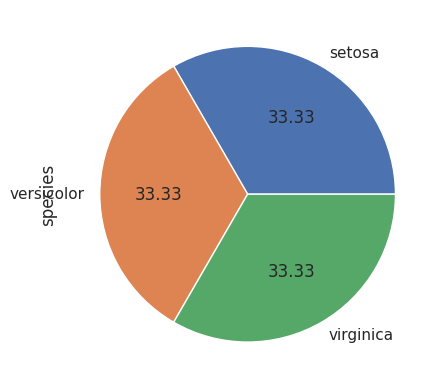

In [ ]:
df_iris['species'].value_counts().plot(kind='pie', autopct ="%0.2f")

## Preprocessing..

### Encoding Tagret values


In [ ]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

df_iris['species'] = target_encoder.fit_transform(df_iris['species'])

In [ ]:
df_iris['species'].unique()

array([0, 1, 2])

## Split into dependent and independent features

In [ ]:
X = df_iris.drop(labels = ['species'], axis =1)
y = df_iris['species']

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

## Train Test Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score

In [ ]:
# Define the classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

iris_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('Scalar', StandardScaler()),
        ('voting_classifier', VotingClassifier(estimators=[
                              ('random_forest', rf_classifier),
                              ('logistic_regression', lr_classifier)],
                          voting='hard'))
    ]
)

## Preprocessing data Using pipeline

In [ ]:
# Train the pipeline
iris_pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test set
y_pred = iris_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


##

## Q1. You are working on a machine learning project where you have a dataset containing numerical and categorical features.

You have identified that some of the features are highly correlated and there are missing values in some of the columns.

You want to build a pipeline that automates the feature engineering process and handles the missing values.

Design a pipeline that includes the following steps:

* Use an automated feature selection method to identify the important features in the dataset.

* Create a numerical pipeline that includes the following steps:

1. mpute the missing values in the numerical columns using the mean of the column values.

2. Scale the numerical columns using standardisation.

* Create a categorical pipeline that includes the following steps:
1. Impute the missing values in the categorical columns using the most frequent value of the column.
2. One-hot encode the categorical columnsC
Combine the numerical and categorical pipelines using a ColumnTransformer.

* Use a Random Forest Classifier to build the final model.

* Evaluate the accuracy of the model on the test dataset.

## Using IBM HR Analytics Employee Attrition & Performance Datset

### About Dataset

[DataSet Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

[Problem Statement and features Explanation](https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html)

Uncover the factors that lead to employee attrition *( Employee attrition is the natural process of leaving the workforce due to personal or professional reasons.)* and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
FilePath = "/content/attrition.csv"

In [3]:
df = pd.read_csv(FilePath)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Basic EDA

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Seperate X and y

In [7]:
X = df.drop(labels=['Attrition'], axis = 1)
y = df['Attrition']

In [8]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

### Encode y feature

In [9]:
y_mapper = {'Yes': 1, 'No': 0}
y = y.replace(y_mapper)

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

## Seperate Numerical and categorical cols

In [14]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)

In [16]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [17]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Feature Selection

### For Numnercial Columns

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

X_num = X[num_cols]

k_best_numerical = SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,y)

selected_num_features = list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

### For categorical Columns

In [20]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder

X_cat = X[cat_cols]
oe = OrdinalEncoder()

X_cat_encoded = pd.DataFrame(oe.fit_transform(X_cat),columns=oe.get_feature_names_out())

k_best_categorical = SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,y)

selected_cat_features = list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [21]:
k_best_categorical.get_support()

array([False,  True,  True, False,  True,  True, False,  True])

In [22]:
selected_features = selected_num_features + selected_cat_features
selected_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [23]:
X_selected = X[selected_features]
X_selected.head()

,Age,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,3,2,4,5993,0,8,6,4,5,Sales,Life Sciences,Sales Executive,Single,Yes
1,49,2,2,2,5130,1,10,10,7,7,Research & Development,Life Sciences,Research Scientist,Married,No
2,37,2,1,3,2090,0,7,0,0,0,Research & Development,Other,Laboratory Technician,Single,Yes
3,33,3,1,3,2909,0,8,8,7,0,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,27,3,1,2,3468,1,6,2,2,2,Research & Development,Medical,Laboratory Technician,Married,No


In [24]:
X_selected.shape

(1470, 15)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.2,random_state=42,stratify=y)

In [27]:
X_train.shape, X_test.shape

((1176, 15), (294, 15))

In [28]:
y_train.value_counts(), y_test.value_counts()

(Attrition
 0    986
 1    190
 Name: count, dtype: int64,
 Attrition
 0    247
 1     47
 Name: count, dtype: int64)

## Creating Pipline for numerical and categorical features.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [32]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('one_hot_encoder',OneHotEncoder())
    ]
)

In [33]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [('num_pipeline', num_pipeline, selected_num_features),
     ('cat_pipeline', cat_pipeline, selected_cat_features)]
)

In [34]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'JobInvolvement', 'JobLevel',
                                  'JobSatisfaction', 'MonthlyIncome',
                                  'StockOptionLevel', 'TotalWorkingYears',
                                  'YearsAtCompany', 'YearsInCurrentRole',
                                  'YearsWithCurrManager']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['Department', 'EducationField', 'JobRole',
                                  'MaritalStatus', 'OverTime'])])

## Transform the dataset with ColumnTransformer

In [35]:
xtrain_transformed = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
xtest_transformed = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [36]:
xtrain_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,1.090194,1.795282,1.762189,-0.647997,2.026752,2.613100,2.261482,-0.665706,-0.625365,-0.616406,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.634828,0.373564,-0.986265,1.153526,-0.864408,0.247430,-1.072675,-0.830071,-0.905635,-0.897047,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.981193,0.373564,1.762189,0.252765,2.347706,0.247430,1.492061,0.813578,1.336527,1.348076,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.307825,0.373564,-0.986265,0.252765,-0.956202,-0.935405,-0.559727,-0.008246,-0.064824,0.506155,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.654191,0.373564,-0.070114,0.252765,-0.185956,0.247430,-0.175017,0.156119,0.775986,0.786795,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [37]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Age', 'num_pipeline__JobInvolvement',
       'num_pipeline__JobLevel', 'num_pipeline__JobSatisfaction',
       'num_pipeline__MonthlyIncome', 'num_pipeline__StockOptionLevel',
       'num_pipeline__TotalWorkingYears', 'num_pipeline__YearsAtCompany',
       'num_pipeline__YearsInCurrentRole',
       'num_pipeline__YearsWithCurrManager',
       'cat_pipeline__Department_Human Resources',
       'cat_pipeline__Department_Research & Development',
       'cat_pipeline__Department_Sales',
       'cat_pipeline__EducationField_Human Resources',
       'cat_pipeline__EducationField_Life Sciences',
       'cat_pipeline__EducationField_Marketing',
       'cat_pipeline__EducationField_Medical',
       'cat_pipeline__EducationField_Other',
       'cat_pipeline__EducationField_Technical Degree',
       'cat_pipeline__JobRole_Healthcare Representative',
       'cat_pipeline__JobRole_Human Resources',
       'cat_pipeline__JobRole_Laboratory Technician',
       'cat_pipeline__Job

## Training Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=21)
rfc.fit(xtrain_transformed,y_train)

RandomForestClassifier(max_depth=8, random_state=21)

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(rfc,xtrain_transformed,y_train,cv=skf,scoring='accuracy')
scores

array([0.83474576, 0.86808511, 0.85957447, 0.86808511, 0.85106383])

In [42]:
np.mean(scores)

0.8563108546700325

## Hyperparameter Tuning

In [44]:
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [45]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)

In [47]:
rscv.fit(xtrain_transformed,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=7, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.856 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.864 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.877 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.877 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=6, min_samples_split=2, n_estimators=10;, score=0.830 total time=   0.1s
[CV 1/5] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.860 total time=   0.8s
[CV 2/5] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.847 total time=   0.8s
[CV 3/5] END max_depth=9, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.872 total time=   0.7s
[CV 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [48]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [49]:
rscv.best_score_

0.8656509195816806

In [50]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

## Evaluate model on test data

In [51]:
ypred_test = best_rfc.predict(xtest_transformed)
ypred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

<Axes: >

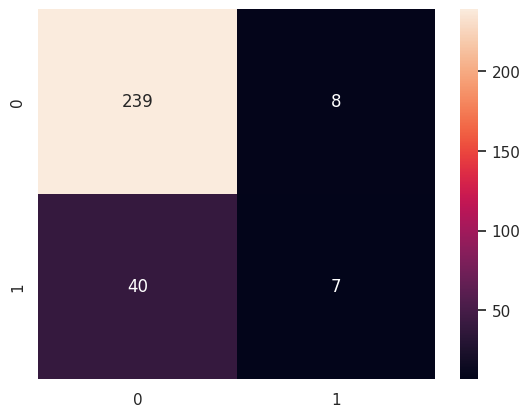

In [53]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [55]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, ypred_test)
print(f'Accuracy on testing data is {acc:.4f}')

Accuracy on testing data is 0.8367


### Insights
1. Above model has accuracy of 0.8503 on testing data
2. However above data has imbalance data on target
3. To deal with imbalanced techniques such as SMOTE (Synthetic Minority Oversampling TEchnique)
4. Feature selection can also be avoided in above data and performance should be checked with all features as well